# Dependencies

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from fbprophet import Prophet

# Load Data

In [7]:
all_df = pd.read_csv('../all_info_utf8.csv')

## Group the data by crop types

In [8]:
grouped_df = all_df.groupby(all_df.作物名稱)

# Use Prophet models to fit the data

In [36]:
banana = grouped_df.get_group('香蕉')
banana = banana[['平均價', 'DateTime']]
banana = banana.rename(columns={'平均價': 'y', 'DateTime': 'ds'})
banana['ds'] = pd.to_datetime(banana['ds'])

# fit a model
m = Prophet()
m.fit(banana)

# predictions
# future = m.make_future_dataframe(periods=365)
# future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
# predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3199,2020-12-26,29.290395,-42.629583,115.027266,-46.282767,114.072606,2.320252,2.320252,2.320252,0.023108,0.023108,0.023108,2.297144,2.297144,2.297144,0.0,0.0,0.0,31.610646
3200,2020-12-27,29.295177,-44.393093,116.075548,-46.716654,114.386322,2.609339,2.609339,2.609339,0.232445,0.232445,0.232445,2.376894,2.376894,2.376894,0.0,0.0,0.0,31.904516
3201,2020-12-28,29.299959,-45.545678,117.372463,-47.150541,114.700038,2.134146,2.134146,2.134146,-0.313600,-0.313600,-0.313600,2.447746,2.447746,2.447746,0.0,0.0,0.0,31.434105
3202,2020-12-29,29.304741,-45.684557,118.625145,-47.584428,115.013753,2.539215,2.539215,2.539215,0.029318,0.029318,0.029318,2.509898,2.509898,2.509898,0.0,0.0,0.0,31.843957
3203,2020-12-30,29.309523,-46.383623,118.321580,-48.018315,115.327469,2.540865,2.540865,2.540865,-0.022806,-0.022806,-0.022806,2.563671,2.563671,2.563671,0.0,0.0,0.0,31.850388


## Plot the forecast

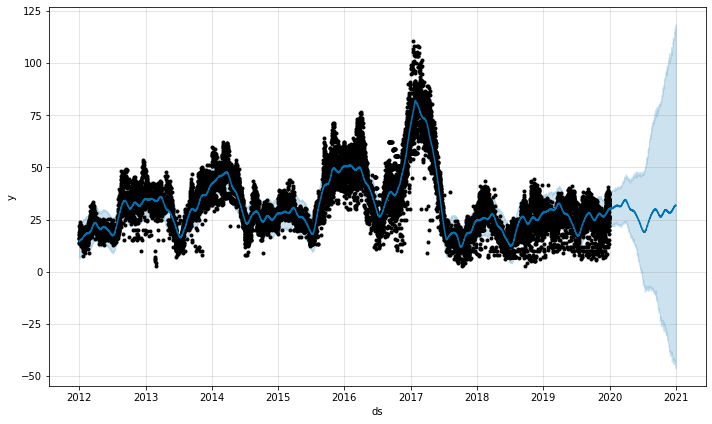

In [34]:
fig = m.plot(forecast)

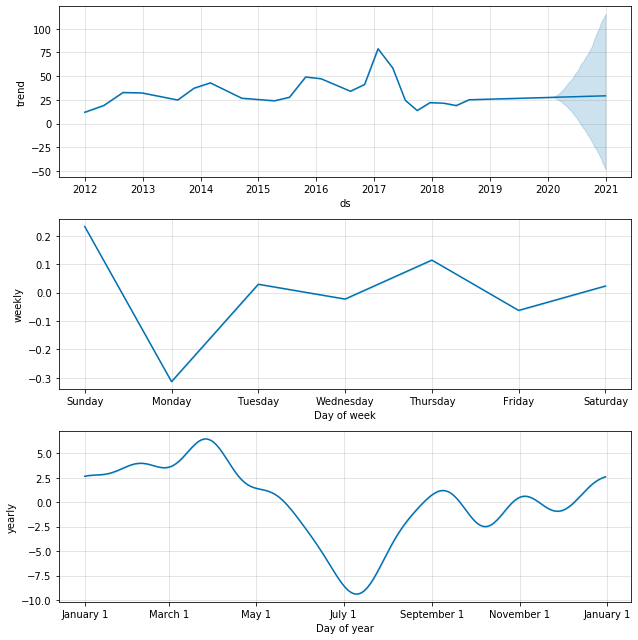

In [35]:
fig_comp = m.plot_components(forecast)